<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



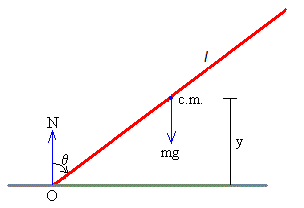


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$l = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy import optimize
from scipy.integrate import quad

## Parametros del problema

In [2]:
l = 0.1
g = 9.8
theta0 = np.pi/12
thetaf = np.pi/2
w0 = 0

## Punto 1.

In [3]:
# Definimos una funcion que tenga las dos ecuaciones diferenciales
def derivadas(y, t):
  theta, w = y

  dthetadt = w
  dwdt = ((2*g/l - w**2*np.cos(theta)) / (1/3 + np.sin(theta)**2)) * np.sin(theta)

  return np.array([dthetadt, dwdt])

# Definimos un intervalo de tiempo para el problema
t = np.linspace(0, 2.5, 1000)

# Definimos el vector con las condiciones iniciales para theta y w
y0 = np.array([theta0, w0])

# Solucionamos la EDO usando odeint
solucion = odeint(derivadas, y0, t)

# Definimos las soluciones para theta, y y w
theta = solucion[:,0]
y = l/2*np.cos(theta)
w = solucion[:,1]

## Punto 2

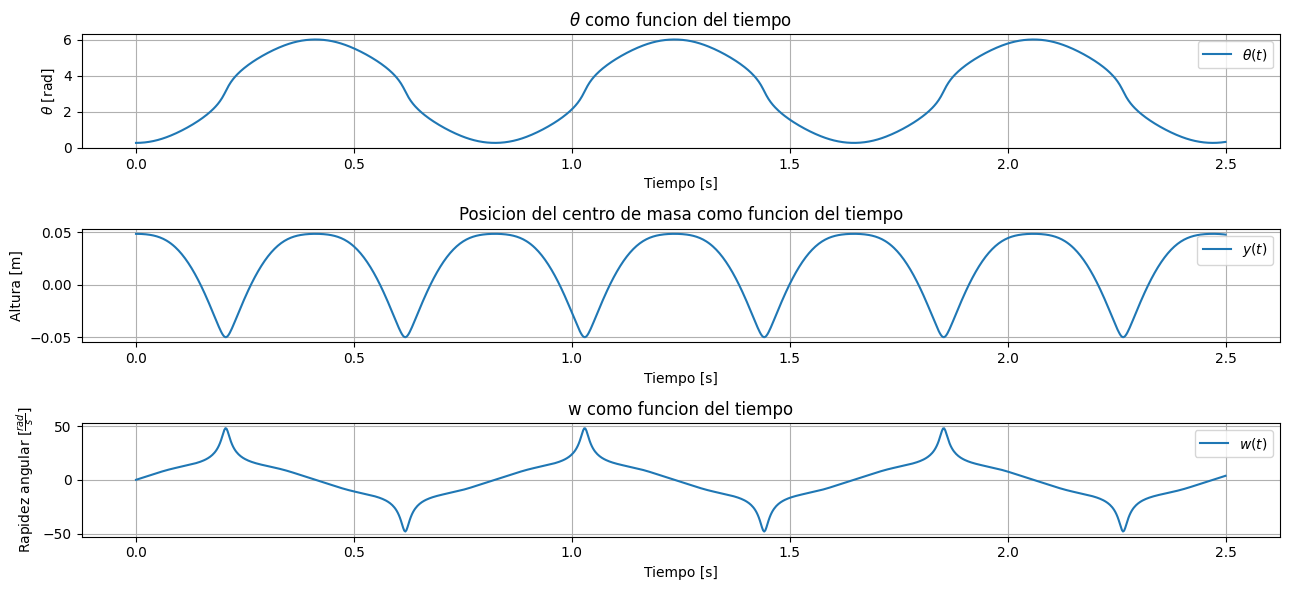

In [4]:
plt.figure(figsize=(13, 6)) # Tamaño de la figura

# Grafico de theta
plt.subplot(3, 1, 1)
plt.title(r'$\theta$ como funcion del tiempo')
plt.plot(t, theta, label = r'$\theta(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.grid()

# Grafico del centro de masa
plt.subplot(3, 1, 2)
plt.title(r'Posicion del centro de masa como funcion del tiempo')
plt.plot(t, y, label = r'$y(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Altura [m]')
plt.legend()
plt.grid()

# Grafico de la rapidez angular
plt.subplot(3, 1, 3)
plt.title(r'w como funcion del tiempo')
plt.plot(t, w, label = r'$w(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Rapidez angular [$\frac{rad}{s}$]')
plt.legend()
plt.grid()

plt.tight_layout()

## Punto 3.

Como observamos en la gráfica del centro de masa, llega un momento en que este alcanza el piso, es decir, la altura cero. Cuando esto ocurre, no tiene sentido que el lápiz siga moviéndose. Por lo tanto, las soluciones que podemos considerar válidas son aquellas que solo llegan hasta el tiempo $t$ en el cual el lápiz toca el suelo, es decir, cuando $y=0$. Por lo tanto, debemos encontrar cuál es este tiempo $t$.

## Punto 4.

Para abordar este punto, realizaremos una calibración aproximada del tiempo utilizando las gráficas del punto 2. En estas, podemos observar que la altura $y$ pasa por el cero entre 0.1 y 0.2 segundos. Por lo tanto, nuestra calibración del tiempo será, por ahora, de un máximo de 0.15 segundos.

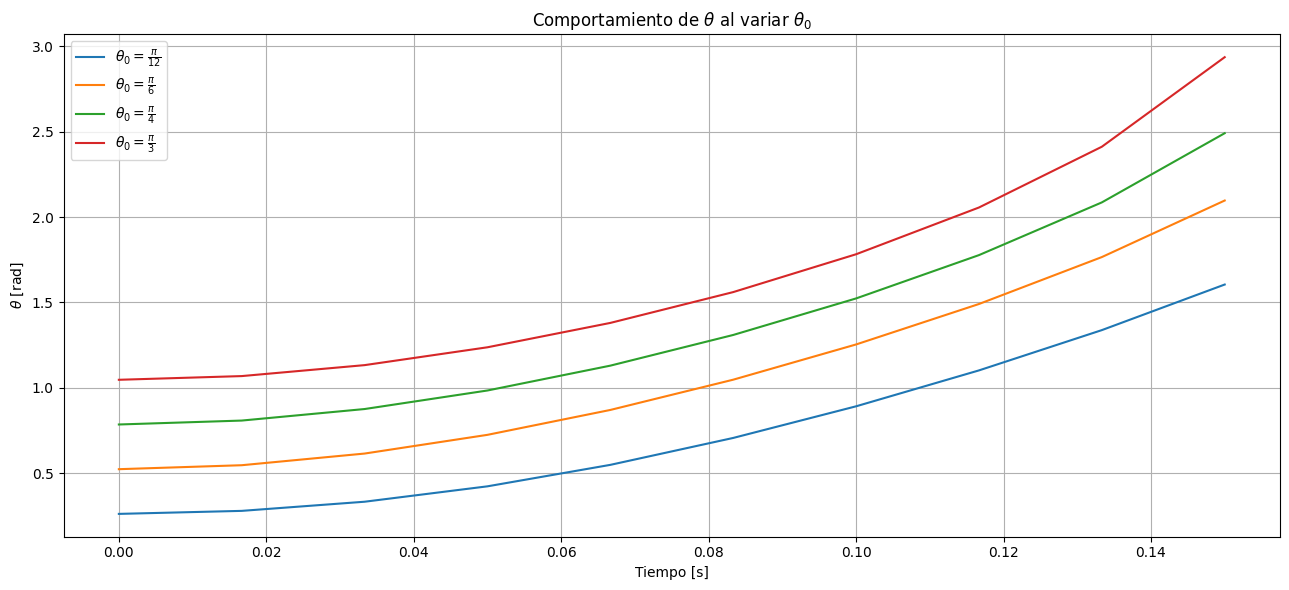

In [5]:
# Definimos el intervalo de tiempo calibrado
tc = np.linspace(0, 0.15, 10)

# Definimos los angulos iniciales a probar
thetas0 = np.array([np.pi/12, np.pi/6, np.pi/4, np.pi/3])
y0s = np.zeros((len(thetas0), 2))
thetas = np.zeros((len(thetas0), len(tc)))


for i in range(len(thetas0)):
  # Definimos el vector con las condiciones iniciales para theta y w
  y0s[i] = np.array([thetas0[i], w0])

  # Definimos la solucion para thetai
  thetas[i] = odeint(derivadas, y0s[i], tc)[:,0]

# Graficamos el comportamiento para los thetas dados
plt.figure(figsize=(13, 6)) # Tamaño de la figura

plt.title(r'Comportamiento de $\theta$ al variar $\theta_0$')
plt.plot(tc, thetas[0], label = r'$\theta_0 = \frac{\pi}{12}$')
plt.plot(tc, thetas[1], label = r'$\theta_0 = \frac{\pi}{6}$')
plt.plot(tc, thetas[2], label = r'$\theta_0 = \frac{\pi}{4}$')
plt.plot(tc, thetas[3], label = r'$\theta_0 = \frac{\pi}{3}$')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.grid()


plt.tight_layout()

## Punto 5.

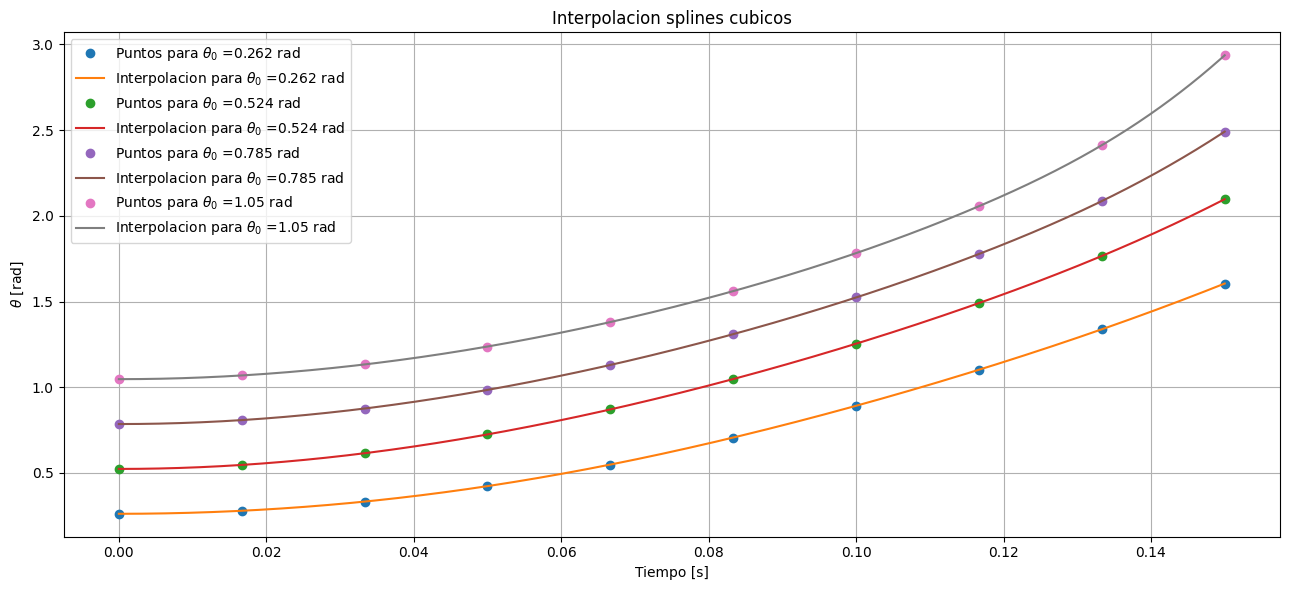

In [6]:
# Definimos el valor de n
N = len(thetas0)
n = N+1

plt.figure(figsize=(13, 6))  # Tamaño de la figura

for i in range(N):
  # Realizamos la interpolacion usando splines cubicos
  fi = CubicSpline(tc, thetas[i]) # Funcion de interpolacion
  ti = np.linspace(np.min(tc), np.max(tc), 1000)

  # Graficamos los puntos y la interpolacion de splines cubicos
  plt.title('Interpolacion splines cubicos')
  plt.plot(tc, thetas[i], 'o', label = r'Puntos para $\theta_0$ =' f'{thetas0[i]:.3} rad')
  plt.plot(ti, fi(ti), '-', label = r'Interpolacion para $\theta_0$ =' f'{thetas0[i]:.3} rad')
  plt.xlabel('Tiempo [s]')
  plt.ylabel(r'$\theta$ [rad]')
  plt.legend()

plt.grid()
plt.tight_layout()

Para determinar el tiempo de caída del lápiz mediante el uso de raíces, ajustaremos la escala de nuestra gráfica. Sabemos que el lápiz tocará el suelo cuando alcance un ángulo de $\frac{\pi}{2}$. Por lo tanto, podemos ajustar nuestra gráfica para que el cero en y corresponda a $\frac{\pi}{2}$. De esta manera, podemos hallar el tiempo que tarda en llegar a este punto utilizando el cálculo de raíces. Dado que ya hemos interpolado los datos, podemos usar la interpolación para encontrar estas raíces.

El tiempo que se demora en caer para theta0 = 0.262 rad es 0.148 s
El tiempo que se demora en caer para theta0 = 0.524 rad es 0.122 s
El tiempo que se demora en caer para theta0 = 0.785 rad es 0.103 s
El tiempo que se demora en caer para theta0 = 1.05 rad es 0.0842 s


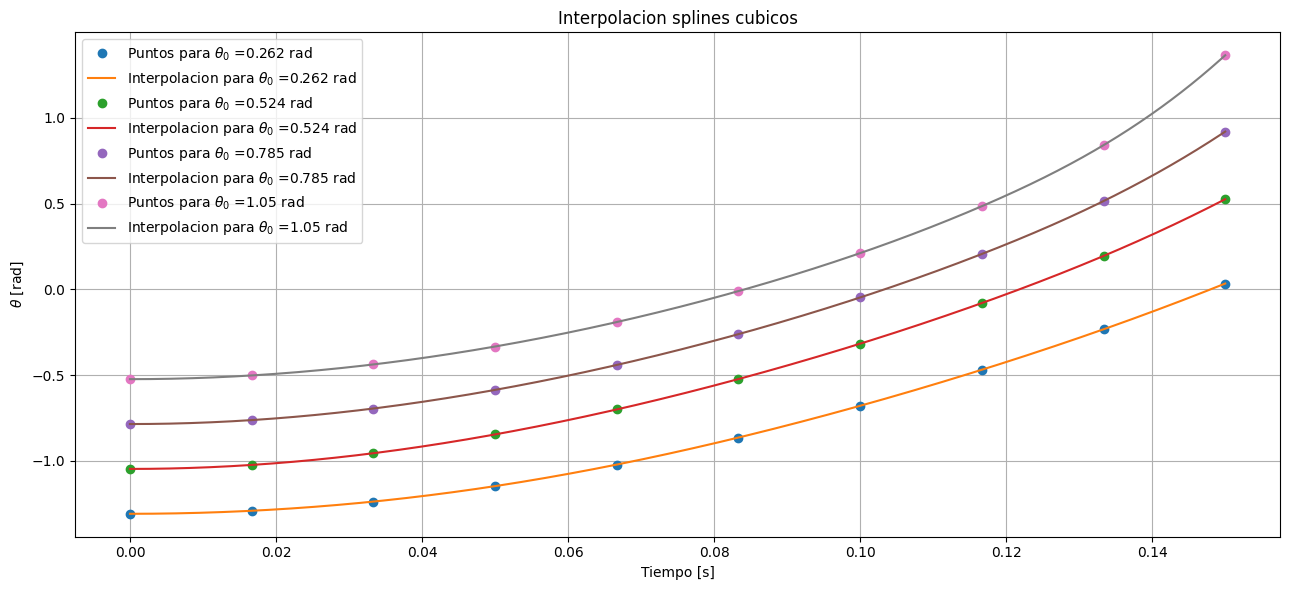

In [7]:
# Ajustamos el cero de nuestra grafica
thetasmov = thetas - thetaf

# Hacemos un array para guardar los tiempos calculados con las raices
Tc = np.zeros_like(thetas0)

# Graficamos la grafica movida
plt.figure(figsize=(13, 6))  # Tamaño de la figura

for i in range(N):
  fi = CubicSpline(tc, thetasmov[i]) # Funcion de interpolacion
  ti = np.linspace(np.min(tc), np.max(tc), 1000)

  # Calculamos las raices con el metodo de la secante
  Tc[i] = optimize.newton(fi, 0.11)
  print(f'El tiempo que se demora en caer para theta0 = {thetas0[i]:.3} rad es {Tc[i]:.3} s')

  # Graficamos los puntos y la interpolacion de splines cubicos
  plt.title('Interpolacion splines cubicos')
  plt.plot(tc, thetasmov[i], 'o', label = r'Puntos para $\theta_0$ =' f'{thetas0[i]:.3} rad')
  plt.plot(ti, fi(ti), '-', label = r'Interpolacion para $\theta_0$ =' f'{thetas0[i]:.3} rad')
  plt.xlabel('Tiempo [s]')
  plt.ylabel(r'$\theta$ [rad]')
  plt.legend()

plt.grid()
plt.tight_layout()

## Punto 6.

In [8]:
# Definimos la funcion que queremos integrar
Tf = lambda theta, theta0: 0.5 * np.sqrt( (l * (1/3 + np.sin(theta)**2) ) / (g * (np.cos(theta0) - np.cos(theta)) ) )

# Calculamos la integral usando quad
T = quad(Tf, theta0, np.pi*0.5, args=theta0)[0]

print(f'El tiempo que se demora el lapiz en caer al suelo es de {T:.3} s')

El tiempo que se demora el lapiz en caer al suelo es de 0.148 s


Observamos que el primer tiempo de caída concuerda muy bien entre el valor calculado mediante la interpolación y el obtenido directamente a partir de la integral.

## Punto 7.

El tiempo que se demora en caer para theta0 = 0.262 rad es 0.148 s
El tiempo que se demora en caer para theta0 = 0.524 rad es 0.122 s
El tiempo que se demora en caer para theta0 = 0.785 rad es 0.103 s
El tiempo que se demora en caer para theta0 = 1.05 rad es 0.0842 s


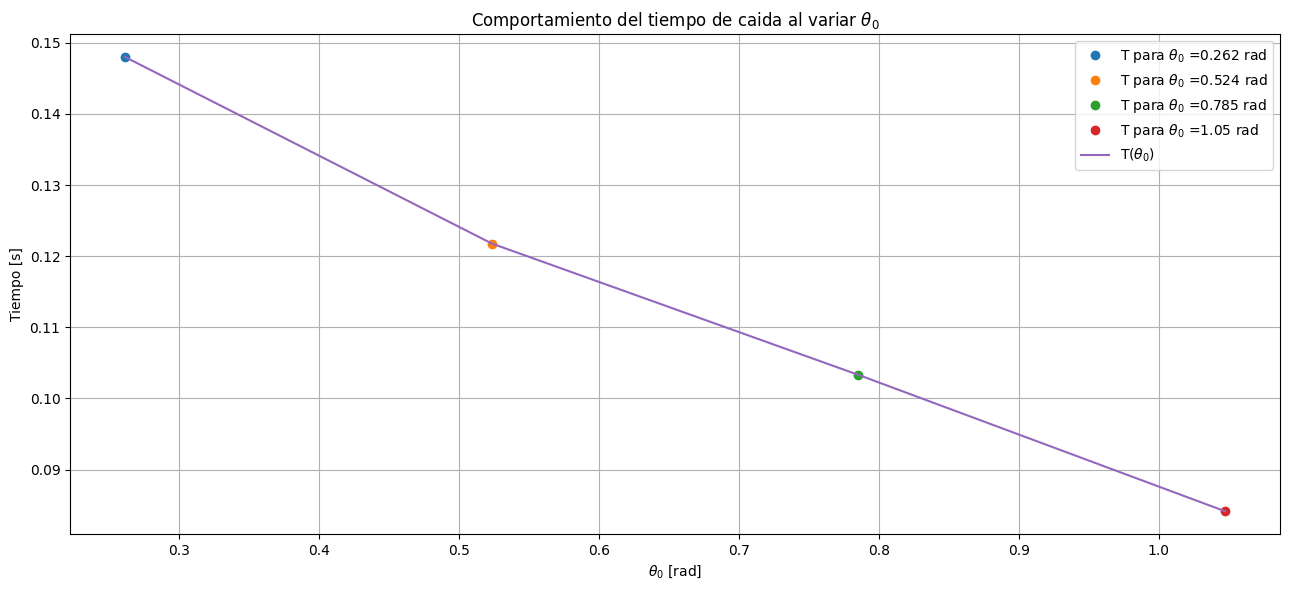

In [9]:
# Definimos un arreglo para almacenar los tiempos calculados
Ts = np.zeros_like(thetas0)

plt.figure(figsize=(13, 6)) # Tamaño de la figura

# Calculamos el tiempo de caida para cada theta0 dado
for i in range(len(thetas0)):
  Ts[i] = quad(Tf, thetas0[i], np.pi/2, args=thetas0[i])[0]
  print(f'El tiempo que se demora en caer para theta0 = {thetas0[i]:.3} rad es {Ts[i]:.3} s')

  # Graficamos el comportamiento del tiempo de caida para los thetas dados
  plt.title(r'Comportamiento del tiempo de caida al variar $\theta_0$')
  plt.plot(thetas0[i], Ts[i], 'o', label = r'T para $\theta_0$ =' f'{thetas0[i]:.3} rad')
  plt.xlabel(r'$\theta_0$ [rad]')
  plt.ylabel('Tiempo [s]')


plt.plot(thetas0, Ts, label = r'T($\theta_0$)')
plt.legend()
plt.grid()
plt.tight_layout()

Podemos observar en la gráfica que, a medida que el ángulo inicial respecto a la normal aumenta, el tiempo que tarda el lápiz en caer al suelo es menor. Esto tiene sentido, ya que un ángulo inicial mayor indica que el lápiz está más cerca del suelo, por lo que tarda menos tiempo en caer.

Comparemos ahora los tiempos de caída obtenidos mediante interpolación y los calculados mediante integración.

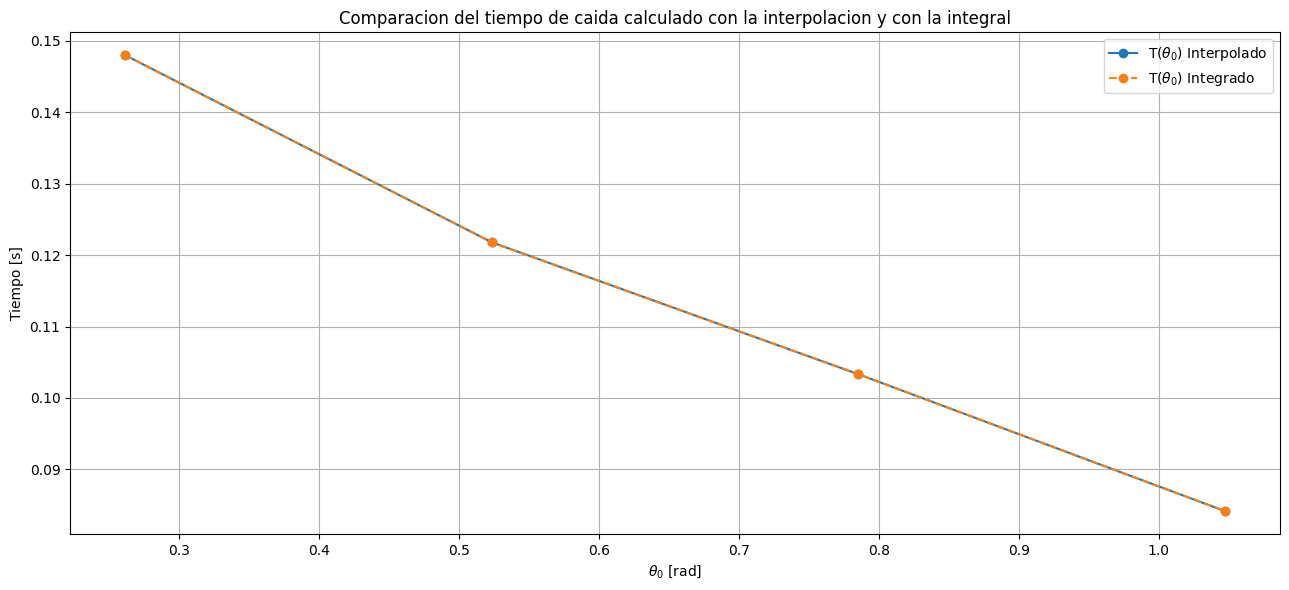

In [10]:
plt.figure(figsize=(13, 6)) # Tamaño de la figura

# Graficamos la comparacion de los tiempos calculados
plt.title('Comparacion del tiempo de caida calculado con la interpolacion y con la integral')
plt.xlabel(r'$\theta_0$ [rad]')
plt.ylabel('Tiempo [s]')
plt.plot(thetas0, Tc, 'o-', label = r'T($\theta_0$) Interpolado')
plt.plot(thetas0, Ts, 'o--', label = r'T($\theta_0$) Integrado')
plt.legend()
plt.grid()
plt.tight_layout()

Podemos observar que los tiempos de caída calculados tanto mediante interpolación como mediante integración se comportan de manera igual. Esto indica que ambos métodos son válidos y confiables para calcular el tiempo de caída del lápiz.